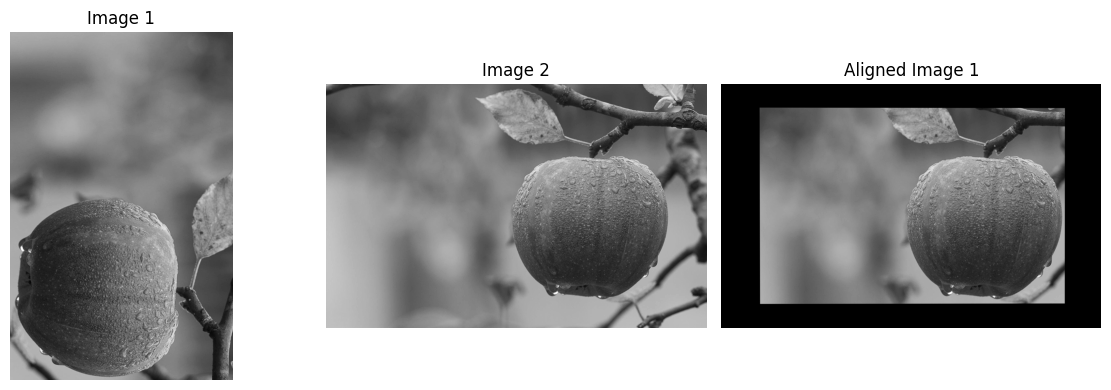

In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import cv2
from skimage import measure, transform

gray_image1 = cv2.imread('./1.jpg', cv2.IMREAD_GRAYSCALE)
gray_image2 = cv2.imread('./2.jpg', cv2.IMREAD_GRAYSCALE)

orb = cv2.ORB_create(nfeatures=500) # You can adjust this number based on your image characteristics

keypoints1, descriptors1 = orb.detectAndCompute(gray_image1, None) 
keypoints2, descriptors2 = orb.detectAndCompute(gray_image2, None)

method = cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING
matcher = cv2.DescriptorMatcher_create(method)
matches = matcher.match(descriptors1, descriptors2, None)

src_pts = np.float32([keypoints1[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2) 
dst_pts = np.float32([keypoints2[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)

model_robust, inliers = cv2.findHomography(src_pts, dst_pts, cv2.RANSAC, 5.0)
aligned_image = cv2.warpPerspective(gray_image1, model_robust, (gray_image2.shape[1], gray_image2.shape[0]))

fig, axes = plt.subplots(1, 3, figsize=(12, 4)) 
ax = axes.ravel()

ax[0].imshow(gray_image1, cmap=plt.cm.gray) 
ax[0].set_title("Image 1")

ax[1].imshow(gray_image2, cmap=plt.cm.gray) 
ax[1].set_title("Image 2")

ax[2].imshow(aligned_image, cmap=plt.cm.gray) 
ax[2].set_title("Aligned Image 1")

for a in ax: a.axis('off')


plt.tight_layout() 
plt.show()
